# Interpolasi Polinom Newton

#### Sintaks diambil dari refrensi channel Youtube : @Edumath , URL : https://www.youtube.com/watch?v=697jfa_svZs 

# Nama Anggota Kelompok 2

### Uswatun Mifathul Jannah              2208541008
### Ni Gusti Ayu Agung Indraswari        2208541010
### Serly Nur Rahmadhani                 2208541011
### Ni Luh Ketut Marsanda Putri Prasanti 2208541026
### Leonardo Edbert Theodora             2208541031
### Adina Nur Halimah Sanwani            2208541033
### Diska Audian Maharani                2208541036
### Putu Andika Pandya                   2208541040

# 

Jumlah titik	: 5
Masukkan fungsi untuk y (contoh: np.cos(x) atau np.sin(x))	: np.cos(x)

Masukkan titik ke-1:
   x = 0

Masukkan titik ke-2:
   x = 1

Masukkan titik ke-3:
   x = 2

Masukkan titik ke-4:
   x = 3

Masukkan titik ke-5:
   x = 4

Koefisien (a): 
 ST		  f(x)
  a[0]		1.0000
  a[1]		-0.4597
  a[2]		-0.2484
  a[3]		0.1466
  a[4]		-0.0147

Prediksi
Titik yang ingin diprediksi: 2.5
P(2.5) = -0.7921


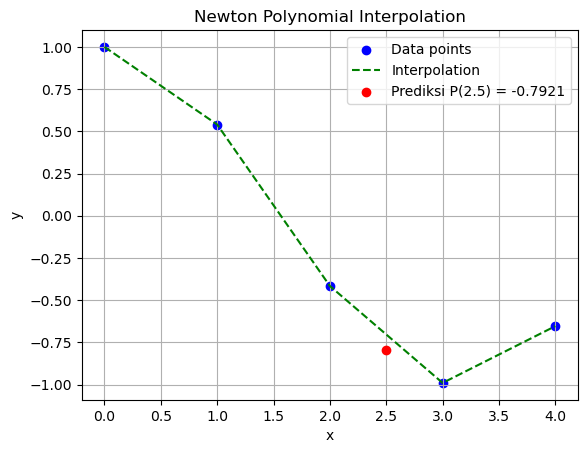

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def newton_polynomial(x, y):
    n = len(x)  # x adalah array 
    
    fdd = np.zeros((n, n)) # define matriks untuk menyimpan nilai" ST
    fdd[:,0] = y # pengisian kolom pertama matriks dengan nilai y
    
    # Perhitungan nilai Selisih Terbagi (ST) / konstanta (a)
    for j in range(1, n):
        for i in range(n - j):
            fdd[i, j] = (fdd[i+1, j-1] - fdd[i, j-1]) / (x[i+j] - x[i])
    
    return fdd[0] # mengembalikan nilai konstanta (a)

def prediksi_polinomial(x, y, xi):
    n = len(x)
    hasil = 0.0
    
    fdd = newton_polynomial(x, y)
    
    for i in range(n):
        persamaan = fdd[i]
        for j in range(i):
            persamaan *= (xi - x[j])
        hasil += persamaan
    
    return hasil

# Input data titik
n = int(input("Jumlah titik\t: "))
x = np.zeros(n)
y = np.zeros(n)

fungsi_input = input("Masukkan fungsi untuk y (contoh: np.cos(x) atau np.sin(x))\t: ")

for i in range(n):
    print(f"\nMasukkan titik ke-{i+1}:")
    x[i] = float(input("   x = "))
    y[i] = eval(fungsi_input.replace('x', f'{x[i]}'))

# Selisih derajat (ST) sebagai koefisien (a)
print("\nKoefisien (a): ")
print(" ST\t\t  f(x)")
a = newton_polynomial(x, y)
for i in range(n):
    print(f"  a[{i}]\t\t{a[i]:.4f}")

# Hasil prediksi
print("\nPrediksi")
xi = float(input("Titik yang ingin diprediksi: "))
hasil_prediksi = prediksi_polinomial(x, y, xi)
print(f"P({xi}) = {hasil_prediksi:.4f}")

# Plot data
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y, color='green', linestyle='dashed', label='Interpolation')

# Plot hasil prediksi
plt.scatter([xi], [hasil_prediksi], color='red', zorder=5, label=f'Prediksi P({xi}) = {hasil_prediksi:.4f}')
plt.title('Newton Polynomial Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
